# Directories and files

In [1]:
# Make a home
SE_VENN_DIR=/data/hodges_lab/Tim/SE_VENN/
mkdir -p ${SE_VENN_DIR}
cd ${SE_VENN_DIR}

REF_DIR=${SE_VENN_DIR}references/
mkdir -p ${REF_DIR}
INTER_DIR=${SE_VENN_DIR}intermediate_files/
mkdir -p ${INTER_DIR}
OUT_DIR=${SE_VENN_DIR}output_files/
mkdir -p ${OUT_DIR}

## Super-enhancer file

As downloaded from https://www.cell.com/fulltext/S0092-8674(13)01227-0#supplementaryMaterial (Hnisz, et al., 2013)

In [2]:
HNISZ_FILE=${REF_DIR}GM12878.bed
GM_SE_FILE=${REF_DIR}GM12878.superenhancers.bed

In [3]:
head -n 3 ${HNISZ_FILE}

track name="Enhancers in GM12878 in GM12878" itemRGB=On color=0,0,0
chr14	22916695	23039397	16_MACS_peak_6764_lociStitched	2
chr3	170951491	171070287	19_MACS_peak_17341_lociStitched	14


In [4]:
wc -l ${HNISZ_FILE}

10875 /data/hodges_lab/Tim/SE_VENN/references/GM12878.bed


In [6]:
# Super enhancer BED starts on line 10619
head -n 10620 ${HNISZ_FILE} | tail -n 5

chr1	17066678	17067042	1_MACS_peak_241_lociStitched	10612

track name="Enhancers in GM12878 in GM12878	" itemRGB=On color=255,0,0
chr14	22916695	23039397	16_MACS_peak_6764_lociStitched	2
chr3	170951491	171070287	19_MACS_peak_17341_lociStitched	14


In [7]:
awk 'BEGIN{OFS=FS="\t"}{if (NR>10618) print $1,$2,$3,$4}' ${HNISZ_FILE} | head

chr14	22916695	23039397	16_MACS_peak_6764_lociStitched
chr3	170951491	171070287	19_MACS_peak_17341_lociStitched
chr14	91781511	91885461	20_MACS_peak_7445_lociStitched
chr5	150438135	150540068	14_MACS_peak_19594_lociStitched
chr14	68714552	68809686	14_MACS_peak_7193_lociStitched
chr17	76683361	76778394	15_MACS_peak_10809_lociStitched
chr5	118643281	118735385	13_MACS_peak_19248_lociStitched
chr9	132745933	132836402	10_MACS_peak_24483_lociStitched
chr13	47126628	47214326	15_MACS_peak_6440_lociStitched
chr1	160673705	160760985	10_MACS_peak_1601_lociStitched


In [3]:
awk 'BEGIN{OFS=FS="\t"}{if (NR>10618) print $1,$2,$3,$4}' ${HNISZ_FILE} | bedtools sort -i - > ${REF_DIR}GM12878.superenhancers.bed

head -n 3 ${REF_DIR}GM12878.superenhancers.bed

chr1	12099148	12149187	8_MACS_peak_185_lociStitched
chr1	22085538	22119057	5_MACS_peak_286_lociStitched
chr1	24213225	24243574	6_MACS_peak_333_lociStitched


## B cell files

In [7]:
cp /data/hodges_lab/Tim/finalAnalyses_HMRs/hp_lineage/filtRefSeqFiles/Bcell.minsize50.filtforrefseqTSSexons.txt ${REF_DIR}
cp /data/hodges_lab/Tim/finalAnalyses_HMRs/hp_lineage/HMRs/Bcell_internalClusters_individualHMRs_hpl.txt ${REF_DIR}

In [10]:
B_ALL=${REF_DIR}Bcell.minsize50.filtforrefseqTSSexons.txt 
B_CL=${REF_DIR}Bcell_internalClusters_individualHMRs_hpl.txt

wc -l ${B_ALL}
head -n 3 ${B_ALL}
echo -e "\n"
wc -l ${B_CL}
head -n 3 ${B_CL}

34070 /data/hodges_lab/Tim/SE_VENN/references/Bcell.minsize50.filtforrefseqTSSexons.txt
chr1	28511	29460	949
chr1	237055	237877	822
chr1	521533	521660	127


5974 /data/hodges_lab/Tim/SE_VENN/references/Bcell_internalClusters_individualHMRs_hpl.txt
chr1	564470	566009	1539
chr1	566458	566879	421
chr1	567166	570301	3135


# Combine into "syntetic regions"

In [11]:
wc -l ${REF_DIR}GM12878.superenhancers.bed
wc -l ${B_CL}
wc -l ${B_ALL}

257 /data/hodges_lab/Tim/SE_VENN/references/GM12878.superenhancers.bed
5974 /data/hodges_lab/Tim/SE_VENN/references/Bcell_internalClusters_individualHMRs_hpl.txt
34070 /data/hodges_lab/Tim/SE_VENN/references/Bcell.minsize50.filtforrefseqTSSexons.txt


In [12]:
cat ${REF_DIR}GM12878.superenhancers.bed ${B_ALL} ${B_CL} | awk 'BEGIN{OFS=FS="\t"}{print $1,$2,$3}' - | bedtools sort -i - | bedtools merge -i - | awk 'BEGIN{OFS=FS="\t"}{print $1,$2,$3,"synReg_"NR}' - > ${INTER_DIR}GMSEs_Bcell_filtforrefseq.synteticRegions.txt


# Map original BEDs to the syntetic regions

In [13]:
# Perform Intersections
bedtools intersect -u -a ${INTER_DIR}GMSEs_Bcell_filtforrefseq.synteticRegions.txt -b ${REF_DIR}GM12878.superenhancers.bed > ${INTER_DIR}Syn_SEs.txt 
bedtools intersect -u -a ${INTER_DIR}GMSEs_Bcell_filtforrefseq.synteticRegions.txt -b ${B_CL} > ${INTER_DIR}Syn_Cl.txt 
bedtools intersect -u -a ${INTER_DIR}GMSEs_Bcell_filtforrefseq.synteticRegions.txt -b ${B_ALL} > ${INTER_DIR}Syn_All.txt 

echo "Done."

Done.


# Plotting

In [1]:
library(tidyverse)
library(eulerr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Load 

In [2]:
setwd("/data/hodges_lab/Tim/SE_VENN/")

syn_all <- read_tsv("./intermediate_files/Syn_All.txt", col_names=c("chr","start","end","region")) 
syn_cl <- read_tsv("./intermediate_files/Syn_Cl.txt", col_names=c("chr","start","end","region")) 
syn_se <- read_tsv("./intermediate_files/Syn_SEs.txt", col_names=c("chr","start","end","region")) 


syn_list <- list(
  SEs = syn_se$region,
  Clustered = syn_cl$region,
  All = syn_all$region
)

Rows: 33346 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): chr, region
dbl (2): start, end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 5690 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): chr, region
dbl (2): start, end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 257 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): chr, region
dbl (2): start, end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Plot call 

png 
  2

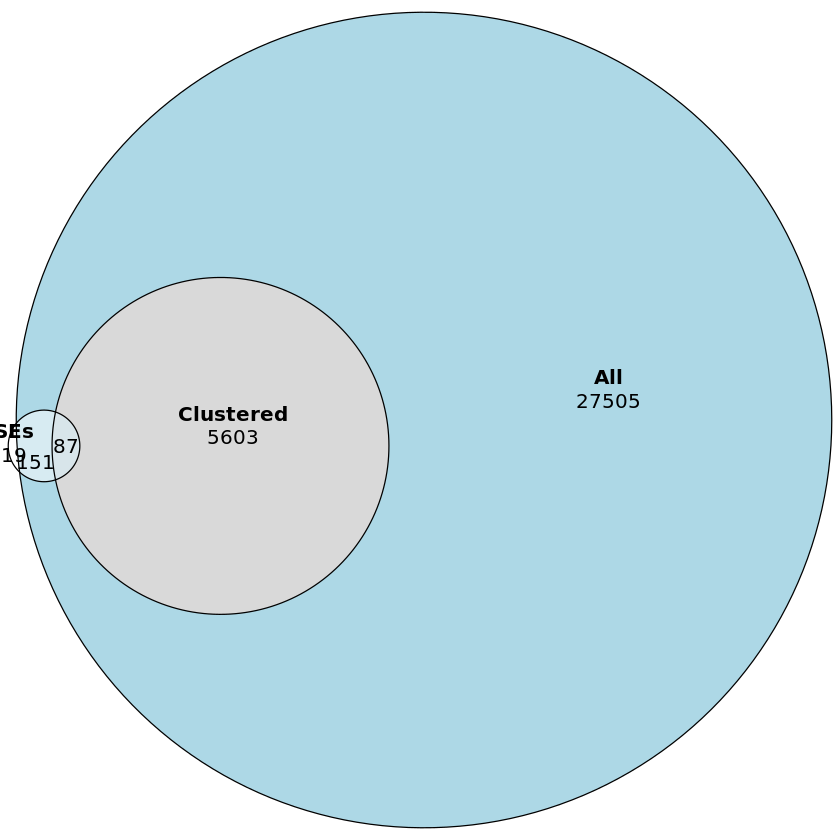

In [13]:
pdf("SE_Bcell_eulerr.pdf")

p_euler <- plot(euler(syn_list, shape = "ellipse"), 
     quantities = TRUE,
     lty = 1)
p_euler

dev.off()
p_euler